## Models included in the Book: Dynamical Systems in Neuroscience

Import useful libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Define simulation parameters

In [3]:
Sim_period = 1000 # ms
Sim_fs   = 1000

dt   = 1/Sim_fs
t    = np.arange(0,Sim_period,dt)

### 8.1.2 Resonate and Fire

In [65]:
Cm = 1
g_leak = 1
E_leak = 1
k = .1
Vpeak = 89
Vrest = 0
Vm = np.zeros(t.shape[0])
W = np.zeros(t.shape[0])

In [66]:
I_stim = np.ones(t.shape)

In [67]:
for i in range(1, t.shape[0]):
    
    dVmdt = (I_stim[i] - g_leak*(Vm[i] - E_leak) - W[i]) / Cm
    Vm[i] = Vm[i-1] + dVmdt * dt
    
    dWdt = (Vm[i-1] - .5*Vm[i-1]) / k - W[i-1]
    W[i] = W[i-1] + dWdt * dt
    
    
    if Vm[i] > Vpeak:
        Vm[i] = Vreset

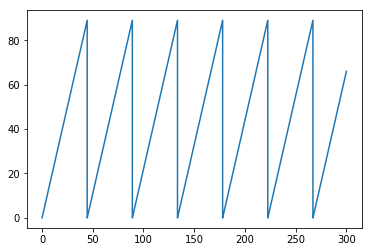

In [68]:
plt.plot(t, Vm)
plt.show()

### 8.1.3 Quadratic Integrate and Fire

In [24]:
b = 0.001
Vm = np.zeros(t.shape[0])
Vpeak = 89
Vreset = 0

In [27]:
for i in range(1, t.shape[0]):
    
    dVmdt = b + Vm[i-1]**2
    Vm[i] = Vm[i-1] + dVmdt * dt
    
    if Vm[i] > Vpeak:
        Vm[i] = Vreset

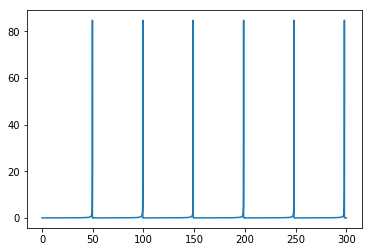

In [28]:
plt.plot(t, Vm)
plt.show()

### 8.1.4 Simple Model

$v$ -> membrane potential <br/>
$u$ -> recovery current <br/>
$C$ -> membrane capacitance <br/>
$v_r$ -> resting membrane potential <br/>
$v_t$ -> intantaneous threshold potential <br/>
$a$ -> recovery time-constant <br/>
$c$ -> voltage reset value <br/>
$v_{peak}$ -> spike cut-off value <br/>
$d$ -> describes the total amount of outward minus inward currents activated during the spike and a®ecting the after-spike behavior.

the parameters k and b can be found when one knows the neuron's rheobase and input resistance. The sign of b determines whether u is an amplifying (b < 0) or a resonant (b > 0) variable.

All these parameters can easily be ¯tted to any particular neuron type, as we show in subsequent sections.

#### Parameters used for RS neocortical pyramidal neurons

In [3]:
C     = 100 # pF
vr    = -60 # mV
vt    = -40 # mV
k     = .7
a     = .03 # ms
b     = -2
c     = -50
d     = 100

vpeak = 35  # spike cutoff (mV)

I_stim = 70;

#### Figure 8.15 (parameters of 8.12 and b=5) - resonator 

In [149]:
C     = 100 # pF
vr    = -60 # mV
vt    = -40 # mV
k     = .7
a     = .03 # ms
b     = 5
c     = -50
d     = 100

vpeak = 35  # spike cutoff (mV)

I_stim = 200; 

#### Hasselmo,2014

In [4]:
C     = 200 # pF
vr    = -60 # mV
vt    = -45 # mV
k     = .75
a     = .01 # ms # decreasing increases the subthreshold oscillation
b     = 15
c     = -50
d     = 100

vpeak = 30  # spike cutoff (mV)

I_stim = 165; 

In [5]:
v     = vr * np.ones(t.shape); 
u     = 0 * v; 

In [6]:
I      = I_stim * np.ones(t.shape)  # pA

In [7]:
spike_count = 0

In [1]:
for i in range(t.shape[0]-1): 
       
    # forward Euler method
    dvdt   = dt * (k*(v[i]-vr)*(v[i]-vt)-u[i]+I[i]) / C
    v[i+1] = v[i]+ dvdt
    
    dudt   = dt * a*(b*(v[i]-vr)-u[i])
    u[i+1] = u[i] + dudt

    if v[i+1] >= vpeak:      # a spike is fired!
        
        v[i]   = vpeak       # padding the spike amplitude
        v[i+1] = c           # membrane voltage reset
        u[i+1] = u[i+1] + d  # recovery variable update
        spike_count = spike_count + 1

NameError: name 't' is not defined

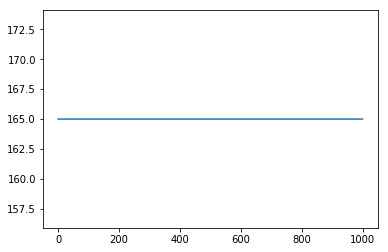

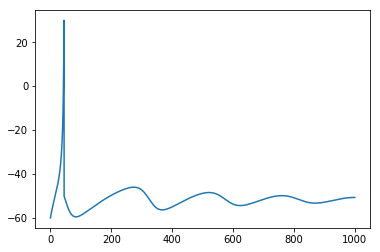

In [9]:
plt.plot(t, I)
plt.show()
plt.plot(t, v)
plt.show()